#### Multiple linear Regression

In [ ]:
y=B0+B1*x1+B2*x2+B3*x3                # y-dependent var. ,and   x1,x2,x3  are multiple independent different features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('50_startups.csv')
dataset.head()
# dataset.columns

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
X = dataset.iloc[:, :-1]   # :-1 tell except last column all the columns in X var.(we always need independent features in array)
y = dataset.iloc[:, 4]    # dependent feature - Profit 
# X

In [4]:
# Converting the State column(categorical feature) using : One Hot Encoding , if we have 2 category convert to : Label encoding.

states = pd.get_dummies(X['State'], drop_first=True)  # drop_first : drops 1st column after converting into dummy var.

In [5]:
# After converting dummy_var. of 'State' column of text format we drop this column from X var. and 
# then concatenate 'states' column of dummy_var into X var.

X = X.drop('State', axis=1)        # dropping 'State' column.
X = pd.concat([X,states], axis=1)  # concatenating 'states' column of dummies.

#### Dummy var.trap : when converting into dummy_var, drop any 1 column.  It is an situation when we take 2 columns instead of 3 columns.

In [6]:
# Now 1st train test split dataset

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
# Creating Multiple Linear Regression model (we have similar library for it), just change the input data(multiple features).

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = regressor.predict(X_test)     # after fitting test data.

In [9]:
# After predicting compare both for accuracy y_pred and y_test
print('Predicted data : ', y_pred)
print('\nActual data :\n', y_test)

Predicted data :  [103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]
Actual data :
 28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


In [10]:
# To compare y_pred , y_test  we use  r_square

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

In [11]:
score

0.9347068473282423

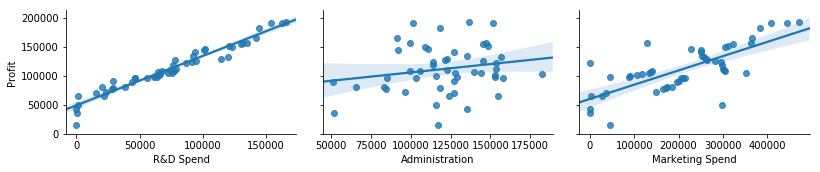

In [18]:
# We can plot -> sns.pairplot for multi-independent var. and dependent var.

import seaborn as sns
sns.pairplot(dataset, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars=['Profit'],
               kind='reg', aspect=1.5)

### R_square :

b/w 0 to 1 (it vary 0.8-0.98 if model is good),  SSmean > SSres 

<img src='r_square.PNG'>